In [1]:
import pandas as pd

train_set = pd.read_csv('train.csv')

train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Dictionary

| Variable   | Definition                          | Key                                        |
|------------|------------------------------------|--------------------------------------------|
| survival   | Survival                            | 0 = No, 1 = Yes                            |
| pclass     | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd                  |
| sex        | Sex                                |                                            |
| Age        | Age in years                        |                                            |
| sibsp      | # of siblings / spouses aboard the Titanic |                                        |
| parch      | # of parents / children aboard the Titanic |                                    |
| ticket     | Ticket number                       |                                            |
| fare       | Passenger fare                      |                                            |
| cabin      | Cabin number                        |                                            |
| embarked   | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |
|            |                                    |                                            |

These are the variables and their definitions for the dataset you mentioned.
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

![convert notebook to web app](https://www.titanicstory.com/cutaway.gif)

![convert notebook to web app](https://i.pinimg.com/736x/68/6b/ee/686bee12fbeaa345afdeec6097eb993a.jpg)

![convert notebook to web app](https://www.simscale.com/wp-content/uploads/2017/12/titanicBreakupReconstruction.jpg)

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
import re

# Define a function to extract the title from the 'Name' column
def extract_title(name):
    title_match = re.search(r' ([A-Za-z]+)\.', name)
    if title_match:
        return title_match.group(1)
    return None

# Define a function to extract the surname from the 'Name' column
def extract_surname(name):
    parts = name.split(',')
    if len(parts) > 0:
        return parts[0]
    return None

# Define a function to group passengers by SibSp, Parch, surname, and title
def find_kindred(passenger):
    group = train_set[(train_set['SibSp'] == passenger['SibSp']) &
                      (train_set['Parch'] == passenger['Parch']) &
                      (train_set['Surname'] == passenger['Surname']) &
                    (train_set['Title'] == passenger['Title'])]
    return group

# Add new 'Surname' and 'Title' columns
train_set['Surname'] = train_set['Name'].apply(extract_surname)
train_set['Title'] = train_set['Name'].apply(extract_title)

train_set['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [24]:
# Fill the 'Cabin' column based on kindred groups, but only for passengers without a 'Cabin' entry
for index, passenger in train_set.iterrows():
    if pd.isna(passenger['Cabin']):  # Check if 'Cabin' is empty
        kindred_group = find_kindred(passenger)
        if len(kindred_group) > 1:  # If there are more than one passenger in the kindred group
            cabin_names = kindred_group['Cabin'].dropna()  # Get non-null cabin names within the group
            if not cabin_names.empty:
                train_set.at[index, 'Cabin'] = cabin_names.iloc[0]  # Fill with the first non-null cabin name

In [25]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        213 non-null    object 
 11  Embarked     889 non-null    object 
 12  Surname      891 non-null    object 
 13  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


The code above didn't help so much. We filled only 9 missing cabins

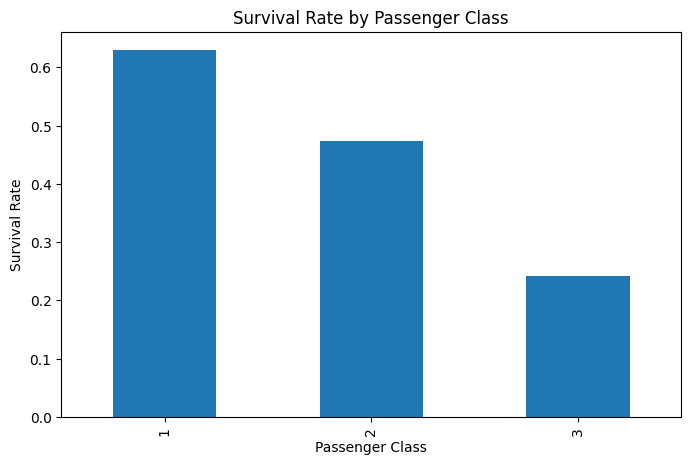

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
train_set.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

It could be explained by the location of cabins in each class. Typically, the higher-class cabins are located in the upper parts of the ship, while lower-class cabins are situated lower down.

We missed some age values. I can fill NaN by mean, median or do some reserch. I assume, that passengers without title are children and we can give them random age between 0 and 16.

'Mr' give 16-70

'Mrs' give 20-80

'Miss' give 12-20

'Master' give 12-20

'Don' give 30-70

'Rev' give 50-80

'Dr' give 40-80

'Mme' give 20-70

'Ms' give 15-80

'Major' give 40-70

'Lady' give 50-80

'Sir' give 50-70

'Mlle' give 12-20

'Col' give 20-40

'Capt' give 20-40

'Countess' give 50-80

'Jonkheer' give 20-70

In [27]:
import random

# Define a function to fill missing age values based on titles
def fill_age_based_on_title(passenger):
    title = passenger['Title']
    age = passenger['Age']

    if pd.isna(age):  # Check if age is missing
        if title == 'Mr':
            return 16 + 54 * random.random()  # Random age between 16 and 70
        elif title == 'Mrs':
            return 20 + 60 * random.random()  # Random age between 20 and 80
        elif title in ['Miss', 'Master', 'Mlle']:
            return 12 + 8 * random.random()  # Random age between 12 and 20
        elif title in ['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Countess', 'Jonkheer']:
            return 30 + 40 * random.random()  # Random age between 30 and 70
        elif title in ['Col', 'Capt']:
            return 20 + 20 * random.random()  # Random age between 20 and 40
        else:  # Default for passengers without a recognized title
            return 0 + 16 * random.random()  # Random age between 0 and 16
    else:
        return age

train_set['Age'] = train_set.apply(fill_age_based_on_title, axis=1)

In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        213 non-null    object 
 11  Embarked     889 non-null    object 
 12  Surname      891 non-null    object 
 13  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


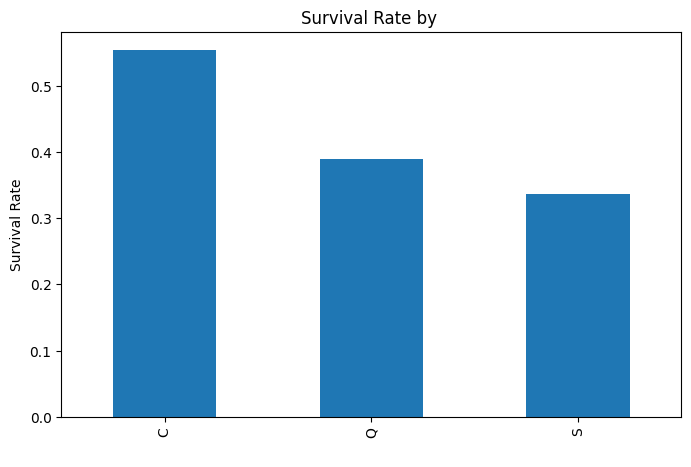

In [33]:
plt.figure(figsize=(8, 5))
train_set.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by ')
plt.xlabel(' ')
plt.ylabel('Survival Rate')
plt.show()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/TitanicRoute.svg/2560px-TitanicRoute.svg.png)

Text(0.5, 0.98, '')

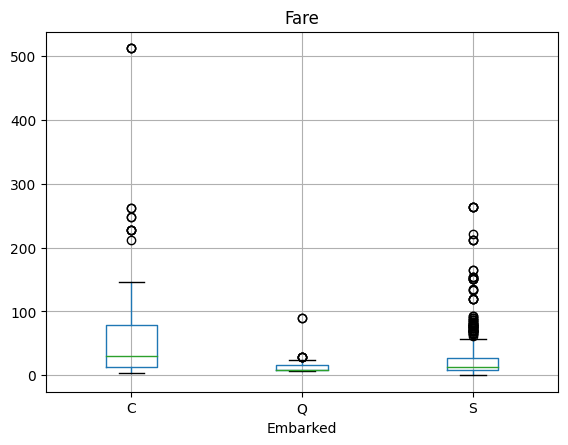

In [38]:
ax = train_set.boxplot(by='Embarked', column='Fare')
ax.set_xlabel('Embarked')
ax.set_ylabel('')
plt.suptitle('')

In [52]:
print(f"Count of classes for passengers from Cherbourg \n{train_set[train_set['Embarked']=='C']['Pclass'].value_counts()} \n {train_set[train_set['Embarked'] == 'C']['Pclass'].value_counts(normalize=True) * 100}\n")
print(f"Count of classes for passengers from Queenstown \n{train_set[train_set['Embarked']=='Q']['Pclass'].value_counts()}\n{train_set[train_set['Embarked'] == 'Q']['Pclass'].value_counts(normalize=True) * 100}\n")
print(f"Count of classes for passengers from Southampton \n{train_set[train_set['Embarked']=='S']['Pclass'].value_counts()}\n{train_set[train_set['Embarked'] == 'S']['Pclass'].value_counts(normalize=True) * 100}\n")

Count of classes for passengers from Cherbourg 
1    85
3    66
2    17
Name: Pclass, dtype: int64 
 1    50.595238
3    39.285714
2    10.119048
Name: Pclass, dtype: float64

Count of classes for passengers from Queenstown 
3    72
2     3
1     2
Name: Pclass, dtype: int64
3    93.506494
2     3.896104
1     2.597403
Name: Pclass, dtype: float64

Count of classes for passengers from Southampton 
3    353
2    164
1    127
Name: Pclass, dtype: int64
3    54.813665
2    25.465839
1    19.720497
Name: Pclass, dtype: float64



French are richer (at least on this board)

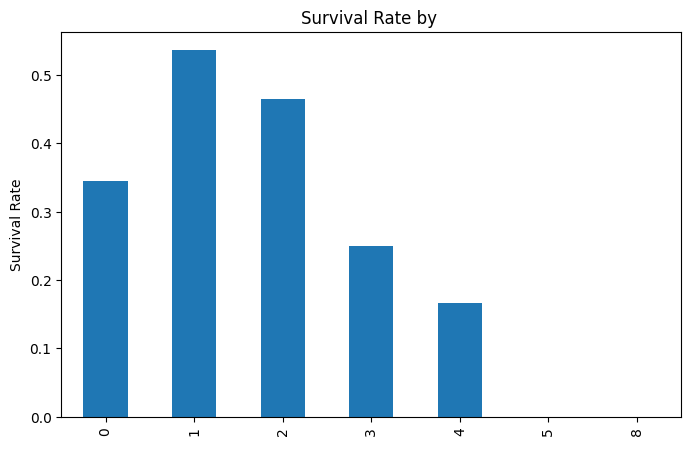

In [34]:
plt.figure(figsize=(8, 5))
train_set.groupby('SibSp')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by ')
plt.xlabel(' ')
plt.ylabel('Survival Rate')
plt.show()

We can observe a correlation between the number of relatives and the likelihood of survival. I assume that it's easier for 2 or 3 family members to assist each other than for members of a large family. For instance, if you are the head of a large family, you would need to simultaneously care for children and elderly members, which could be more challenging.

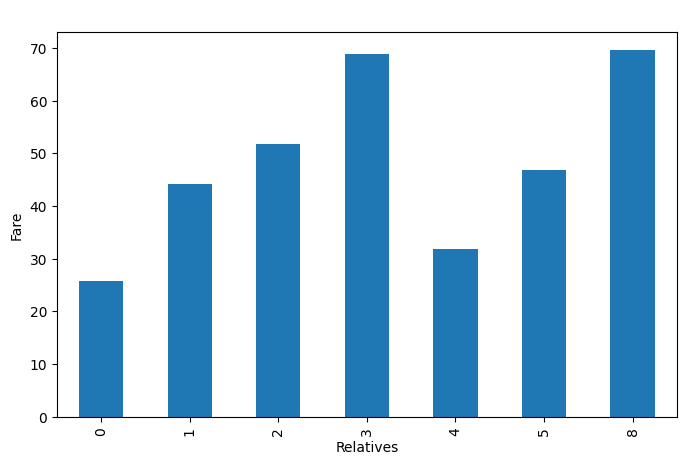

In [55]:
plt.figure(figsize=(8, 5))
train_set.groupby('SibSp')['Fare'].mean().plot(kind='bar')
plt.title(' ')
plt.xlabel('Relatives')
plt.ylabel('Fare')
plt.show()